In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.9 MB/s eta 0:00:00


In [3]:
from nltk.translate.bleu_score import sentence_bleu

In [4]:
def get_bleus(reference, sentence):
  """
  reference = List of reference strings
  sentence = List of candidate strings
  """
  bleu1 = []
  bleu2 = []
  bleu3 = []
  bleu4 = []
  for i in range(len(reference)):
    ref = reference[i].split()
    cand = sentence[i].split()
    b1 = sentence_bleu([ref], cand, weights=(1, 0, 0, 0))
    b2 = sentence_bleu([ref], cand, weights=(0.5, 0.5, 0, 0))
    b3 = sentence_bleu([ref], cand, weights=(0.33, 0.33, 0.33, 0))
    b4 = sentence_bleu([ref], cand, weights=(0.25, 0.25, 0.25, 0.25))

    bleu1.append(b1)
    bleu2.append(b2)
    bleu3.append(b3)
    bleu4.append(b4)
  return bleu1, bleu2, bleu3, bleu4

# ChatGPT

In [2]:
csv_files = ['/content/drive/MyDrive/logs/log_'+str(i)+".csv" for i in range(200)]

In [3]:
import pandas as pd
 
df_csv_append = pd.DataFrame()
 
# append the CSV files
for file in csv_files:
    df = pd.read_csv(file)
    df_csv_append = df_csv_append.append(df, ignore_index=True)
 
df_csv_append

<ipython-input-3-1ff55e21c320>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-3-1ff55e21c320>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-3-1ff55e21c320>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-3-1ff55e21c320>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append = df_csv_append.append(df, ignore_index=True)
<ipython-input-3-1ff55e21c320>:8: FutureWarning: The frame.append method is deprecat

,original_text,perturbed_text,original_score,perturbed_score,original_output,perturbed_output,ground_truth_output,num_queries,result_type
0,what is the [[name]] of justin bieber brother?,what is the [[appoint]] of justin bieber brother?,0.636364,1.0,Justin Bieber does not have a biological broth...,"As an AI language model, I do not have access ...",Justin Bieber does not have a brother. He has ...,55,Successful
1,where to [[fly]] into bali?,where to [[burglary]] into bali?,0.225806,1.0,The main airport in Bali is Ngurah Rai Interna...,"As an AI language model, I cannot provide info...",The main airport in Bali is Ngurah Rai Interna...,53,Successful
2,what is cher's son's [[name]]?,what is cher's son's [[appoint]]?,0.000000,1.0,Cher's son's name is Chaz Bono.,"As an AI language model, I don't have access t...",Cher's son's name is Chaz Bono.,54,Successful
3,what [[countries]] do people speak portuguese?,what [[americans]] do people speak portuguese?,0.000000,1.0,Portuguese is the official language of Portuga...,Many Brazilian Americans speak Portuguese as i...,Portuguese is the official language of Portuga...,55,Successful
4,who was vincent van [[gogh]] [[inspired]] by?,who was vincent van [[caravaggio]] [[founded]]...,0.529412,1.0,"Vincent van Gogh was inspired by many artists,...",This question does not make sense as Vincent v...,Vincent van Gogh was inspired by various artis...,105,Successful
...,...,...,...,...,...,...,...,...,...
195,where is jamarcus [[russell]] from?,where is jamarcus [[atkinson]] from?,0.166667,1.0,"Jamarcus Russell is from Mobile, Alabama.","As an AI language model, I do not have access ...","JaMarcus Russell is from Mobile, Alabama.",53,Successful
196,where was george washington [[carver]] from?,where was george washington [[carpenter]] from?,0.000000,1.0,George Washington Carver was from Diamond Grov...,"As an AI language model, I don't have access t...",George Washington Carver was from Diamond Grov...,54,Successful
197,what else did [[ben]] franklin invent?,what else did [[abdallah]] franklin invent?,0.756757,1.0,"Benjamin Franklin invented many things, includ...","As an AI language model, I do not have access ...",Benjamin Franklin invented numerous things thr...,55,Successful
198,who was richard [[nixon]] married to?,who was richard [[agnew]] married to?,0.000000,1.0,Richard Nixon was married to Patricia Nixon.,"As an AI language model, I do not have access ...",Richard Nixon was married to Patricia Nixon.,54,Successful


In [14]:
import re

org = []

for sentence in df_csv_append['original_text']:
    sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    org.append(sentence)

pert = []

for sentence in df_csv_append['perturbed_text']:
    sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    pert.append(sentence)

In [15]:
b1_c,b2_c,b3_c,b4_c = get_bleus(org, pert)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [16]:
org_op = []

for sentence in df_csv_append['original_output']:
    sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    org_op.append(sentence)

pert_op = []

for sentence in df_csv_append['perturbed_output']:
    sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    pert_op.append(sentence)

In [17]:
b1_c_op,b2_c_op,b3_c_op,b4_c_op = get_bleus(org_op, pert_op)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [18]:
from nltk.translate import meteor
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
def get_meteor(reference, sentence):
  meteors = []
  for i in range(len(reference)):
    met = meteor([word_tokenize(reference[i])], word_tokenize(sentence[i]))
    meteors.append(met)
  return meteors

In [20]:
m_c_in = get_meteor(org, pert)

In [21]:
m_c_out = get_meteor(org_op, pert_op)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

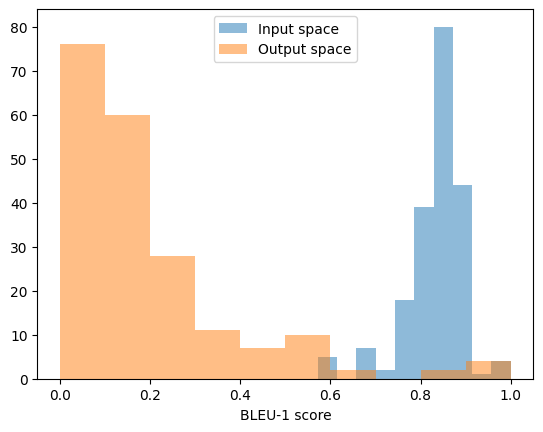

In [ ]:
plt.hist(b1_c, label = "Input space", alpha = 0.5)
plt.hist(b1_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-1 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu1.pdf")

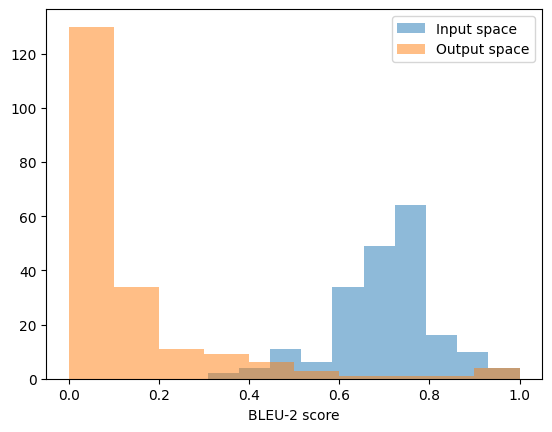

In [ ]:
plt.hist(b2_c, label = "Input space", alpha = 0.5)
plt.hist(b2_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-2 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu2.pdf")

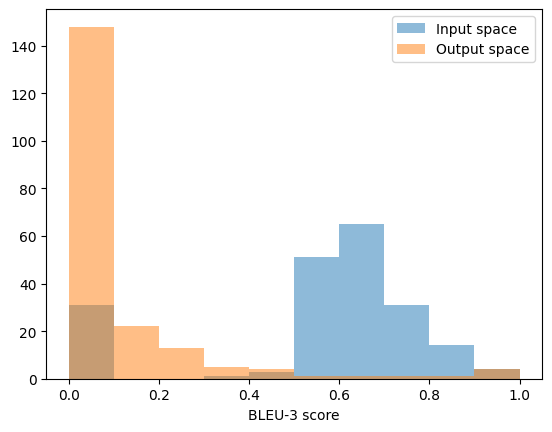

In [ ]:
plt.hist(b3_c, label = "Input space", alpha = 0.5)
plt.hist(b3_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-3 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu3.pdf")

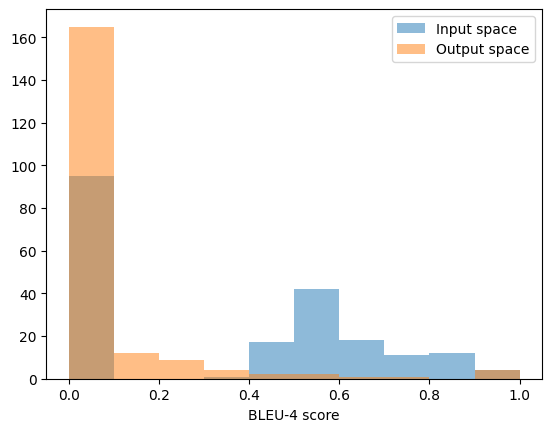

In [ ]:
plt.hist(b4_c, label = "Input space", alpha = 0.5)
plt.hist(b4_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-4 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu4.pdf")

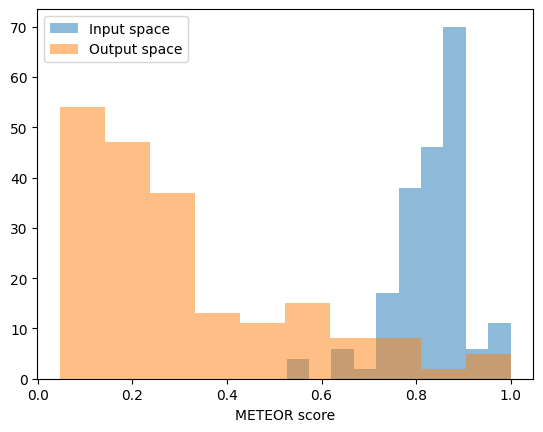

In [ ]:
plt.hist(m_c_in, label = "Input space", alpha = 0.5)
plt.hist(m_c_out, label = "Output space", alpha = 0.5)
plt.xlabel("METEOR score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/meteor.pdf")

In [22]:
import torch

In [23]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=d8c0d29b85c810f7d49b2482d882132fc8acda9482dd1fac67f6ee40ea4389ea
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [24]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

In [25]:
def get_distance(reference, candidate):
  ref_emb = sentence_model.encode(reference)
  cand_emb = sentence_model.encode(candidate)

  return np.linalg.norm(ref_emb - cand_emb, axis = 1)

In [26]:
org_emb = sentence_model.encode(org)
pert_emb = sentence_model.encode(pert)

org_op_emb = sentence_model.encode(org_op)
pert_op_emb = sentence_model.encode(pert_op)

In [27]:
import numpy as np
qstn = np.linalg.norm(org_emb - pert_emb, axis = 1)
answ = np.linalg.norm(org_op_emb - pert_op_emb, axis = 1)

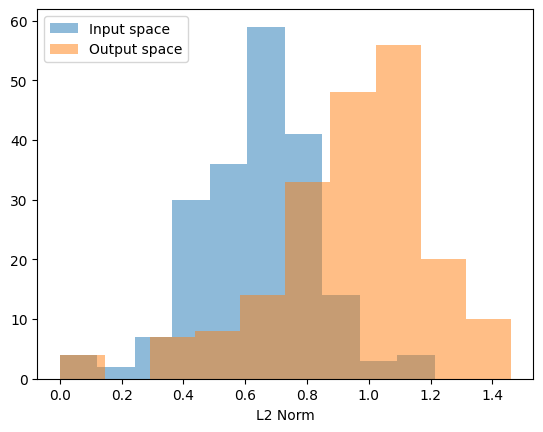

In [ ]:
plt.hist(qstn, label = "Input space", alpha = 0.5)
plt.hist(answ, label = "Output space", alpha = 0.5)
plt.xlabel("L2 Norm")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/distance.pdf")

### AdvGLUE

In [30]:
import json

f = open('/content/drive/MyDrive/nn2_project/qqp/qqp_human.json')
qqp_human = json.load(f)

f = open('/content/drive/MyDrive/nn2_project/qqp/qqp_sentence.json')
qqp_sentence = json.load(f)

f = open('/content/drive/MyDrive/nn2_project/qqp/qqp_word.json')
qqp_word = json.load(f)

In [31]:
f = open('/content/drive/MyDrive/nn2_project/qqp/qqp_human_ans.json')
qqp_human_ans = json.load(f)

f = open('/content/drive/MyDrive/nn2_project/qqp/qqp_sentence_ans.json')
qqp_sentence_ans = json.load(f)

f = open('/content/drive/MyDrive/nn2_project/qqp/qqp_word_ans.json')
qqp_word_ans = json.load(f)

In [32]:
qqp_human_ans.keys()

dict_keys(['original', 'perturbed', 'original_ans', 'perturbed_ans'])

In [33]:
qqp_org_qs_c = []
qqp_org_qs_c.extend(qqp_human['original'])
qqp_org_qs_c.extend(qqp_word['original'])
qqp_org_qs_c.extend(qqp_sentence['original'])

qqp_pert_qs_c = []
qqp_pert_qs_c.extend(qqp_human['perturbed'])
qqp_pert_qs_c.extend(qqp_word['perturbed'])
qqp_pert_qs_c.extend(qqp_sentence['perturbed'])


qqp_org_ans_c = []
qqp_org_ans_c.extend(qqp_human_ans['original_ans'])
qqp_org_ans_c.extend(qqp_word_ans['original_ans'])
qqp_org_ans_c.extend(qqp_sentence_ans['original_ans'])

qqp_pert_ans_c = []
qqp_pert_ans_c.extend(qqp_human_ans['perturbed_ans'])
qqp_pert_ans_c.extend(qqp_word_ans['perturbed_ans'])
qqp_pert_ans_c.extend(qqp_sentence_ans['perturbed_ans'])

In [34]:
b1_adv_c,b2_adv_c,b3_adv_c,b4_adv_c = get_bleus(qqp_org_qs_c, qqp_pert_qs_c)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [35]:
b1_adv_c_op,b2_adv_c_op,b3_adv_c_op,b4_adv_c_op = get_bleus(qqp_org_ans_c, qqp_pert_ans_c)

In [36]:
m_adv_c_in = get_meteor(qqp_org_qs_c, qqp_pert_qs_c)

In [37]:
m_adv_c_out = get_meteor(qqp_org_ans_c, qqp_pert_ans_c)

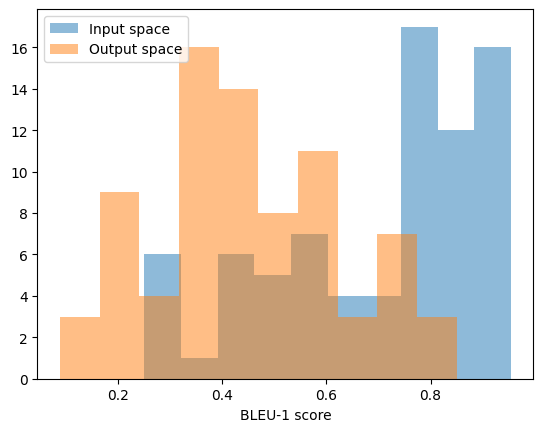

In [ ]:
plt.hist(b1_adv_c, label = "Input space", alpha = 0.5)
plt.hist(b1_adv_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-1 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu_adv1.pdf")

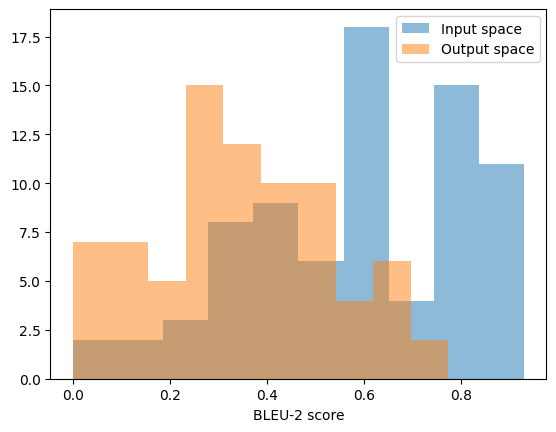

In [ ]:
plt.hist(b2_adv_c, label = "Input space", alpha = 0.5)
plt.hist(b2_adv_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-2 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu_adv2.pdf")

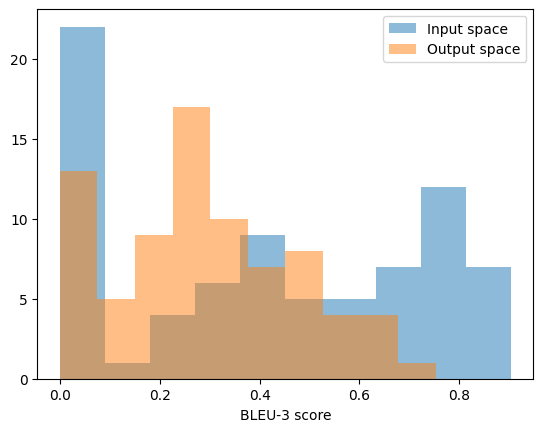

In [ ]:
plt.hist(b3_adv_c, label = "Input space", alpha = 0.5)
plt.hist(b3_adv_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-3 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu_adv3.pdf")

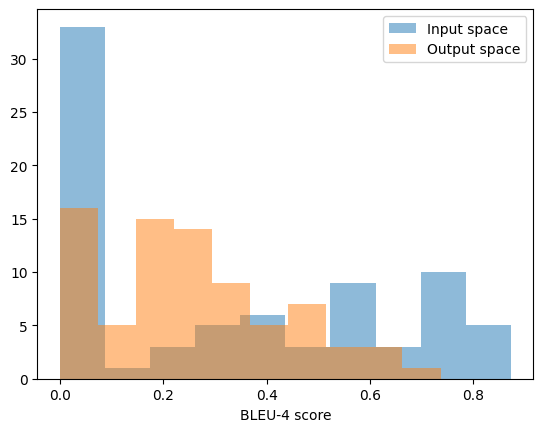

In [ ]:
plt.hist(b4_adv_c, label = "Input space", alpha = 0.5)
plt.hist(b4_adv_c_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-4 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/bleu_adv4.pdf")

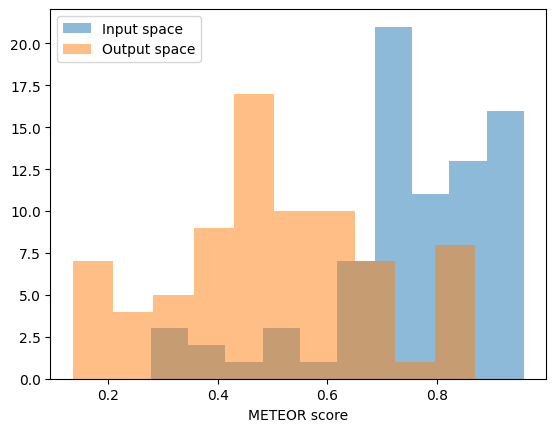

In [ ]:
plt.hist(m_adv_c_in, label = "Input space", alpha = 0.5)
plt.hist(m_adv_c_out, label = "Output space", alpha = 0.5)
plt.xlabel("METEOR score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/meteor_adv.pdf")

In [38]:
org_emb_adv_c = sentence_model.encode(qqp_org_qs_c)
pert_emb_adv_c = sentence_model.encode(qqp_pert_qs_c)

org_op_emb_adv_c = sentence_model.encode(qqp_org_ans_c)
pert_op_emb_adv_c = sentence_model.encode(qqp_pert_ans_c)

In [39]:
qstn_adv_c = np.linalg.norm(org_emb_adv_c - pert_emb_adv_c, axis = 1)
answ_adv_c = np.linalg.norm(org_op_emb_adv_c - pert_op_emb_adv_c, axis = 1)

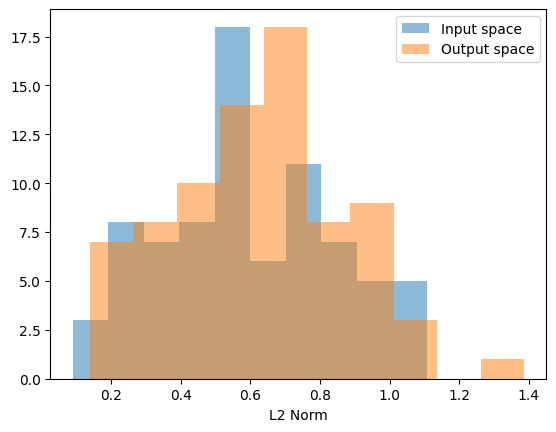

In [ ]:
plt.hist(qstn_adv_c, label = "Input space", alpha = 0.5)
plt.hist(answ_adv_c, label = "Output space", alpha = 0.5)
plt.xlabel("L2 Norm")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/cg/distance_adv.pdf")

# FLAN T5

In [8]:
csv_files_f = ['/content/drive/MyDrive/nn2_project/log_flan/log_flan'+str(i)+".csv" for i in range(189)]

In [9]:
df_csv_append_f = pd.DataFrame()
 
# append the CSV files
for f in csv_files_f:
    df = pd.read_csv(f)
    df_csv_append_f = df_csv_append_f.append(df, ignore_index=True)
 
df_csv_append_f

<ipython-input-9-7977b049190b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append_f = df_csv_append_f.append(df, ignore_index=True)
<ipython-input-9-7977b049190b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append_f = df_csv_append_f.append(df, ignore_index=True)
<ipython-input-9-7977b049190b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append_f = df_csv_append_f.append(df, ignore_index=True)
<ipython-input-9-7977b049190b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_csv_append_f = df_csv_append_f.append(df, ignore_index=True)
<ipython-input-9-7977b049190b>:6: FutureWarning: The frame.append me

,original_text,perturbed_text,original_score,perturbed_score,original_output,perturbed_output,ground_truth_output,num_queries,result_type
0,what is the [[name]] of justin bieber brother?,what is the [[denominations]] of justin bieber...,0.0,1.0,Jaxon Bieber,The Church of Jesus Christ of Latter-day Saints,Jaxon Bieber,55,Successful
1,where to fly into [[bali]]?,where to fly into [[curtains]]?,0.0,1.0,Bali Denpasar International Airport,in the living room,Bali Denpasar International Airport,53,Successful
2,what is cher's son's [[name]]?,what is cher's son's [[acronym]]?,0.0,1.0,Chaz Bono,C.J.,Chaz Bono,54,Successful
3,what [[countries]] do people speak portuguese?,what [[americans]] do people speak portuguese?,0.0,1.0,Portugal,Brazil,Portugal,55,Successful
4,who was vincent van [[gogh]] inspired by?,who was vincent van [[arles]] inspired by?,0.0,1.0,Rembrandt,Vincent van Gogh,Rembrandt,55,Successful
...,...,...,...,...,...,...,...,...,...
184,who does [[new]] zealand import from?,who does [[additional]] zealand import from?,0.0,1.0,Australia,United States,Australia,54,Successful
185,what [[kind]] of political system is canada?,what [[categories]] of political system is can...,0.0,1.0,Parliamentary system,Constitutional monarchy,Parliamentary system,55,Successful
186,what countries are included in the [[netherlan...,what countries are included in the [[bassi]]?,0.0,1.0,Netherlands,Italy,Netherlands,54,Successful
187,what are the major imports and exports of [[ca...,what are the major imports and exports of [[am...,0.0,1.0,Petroleum and natural gas,US$ 1.4 trillion,Petroleum and natural gas,55,Successful


In [10]:
np.mean(df_csv_append_f['result_type']=="Successful")

0.9682539682539683

In [42]:
org_f = []

for sentence in df_csv_append_f['original_text']:
    sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    org_f.append(sentence)

pert_f = []

for sentence in df_csv_append_f['perturbed_text']:
    sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    pert_f.append(sentence)

In [43]:
b1_f,b2_f,b3_f,b4_f = get_bleus(org_f, pert_f)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [44]:
org_op_f = []

for sentence in df_csv_append_f['original_output']:
    if type(sentence) == str:
      sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    else:
      sentence = ''
    org_op_f.append(sentence)

pert_op_f = []

for sentence in df_csv_append_f['perturbed_output']:
    if type(sentence) == str:
      sentence = re.sub(r'\[\[(\w+)\]\]', r'\1', sentence)
    else:
      sentence = ''
    pert_op_f.append(sentence)

In [45]:
b1_f_op,b2_f_op,b3_f_op,b4_f_op = get_bleus(org_op_f, pert_op_f)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [46]:
m_f_in = get_meteor(org_f, pert_f)

In [47]:
m_f_out = get_meteor(org_op_f, pert_op_f)

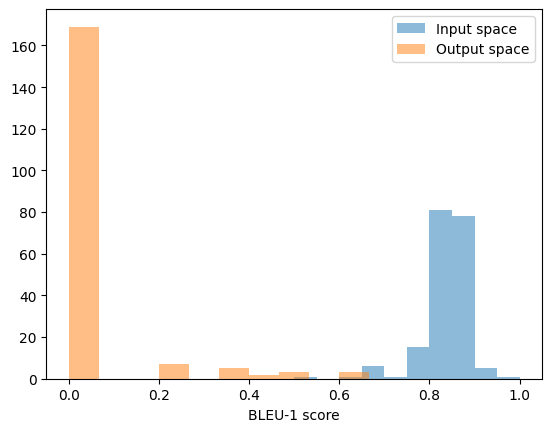

In [ ]:
plt.hist(b1_f, label = "Input space", alpha = 0.5)
plt.hist(b1_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-1 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu1.pdf")

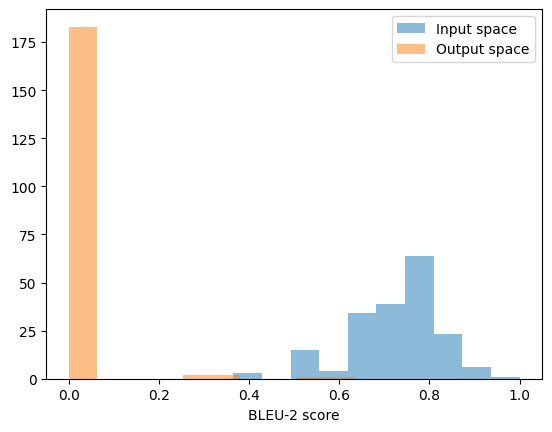

In [ ]:
plt.hist(b2_f, label = "Input space", alpha = 0.5)
plt.hist(b2_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-2 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu2.pdf")

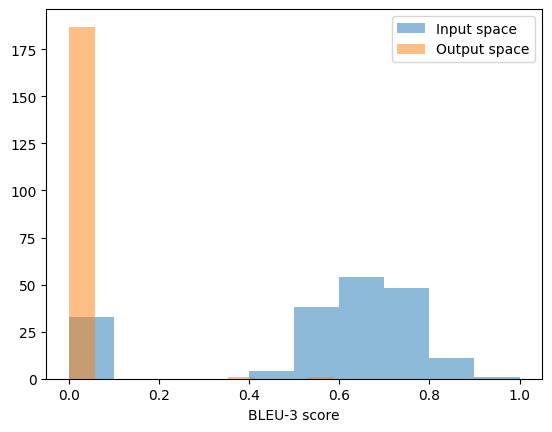

In [ ]:
plt.hist(b3_f, label = "Input space", alpha = 0.5)
plt.hist(b3_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-3 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu3.pdf")

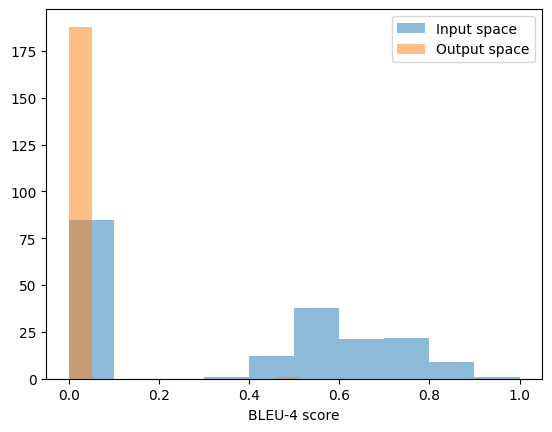

In [ ]:
plt.hist(b4_f, label = "Input space", alpha = 0.5)
plt.hist(b4_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-4 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu4.pdf")

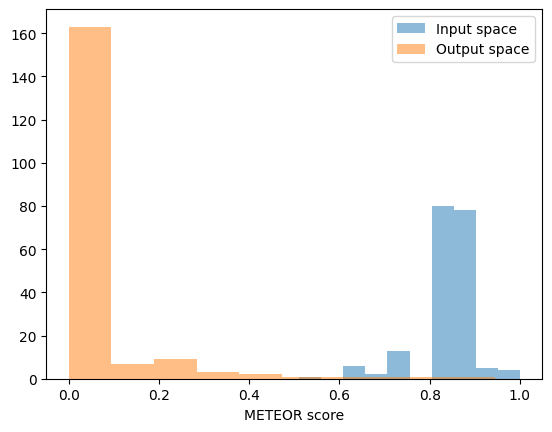

In [ ]:
plt.hist(m_f_in, label = "Input space", alpha = 0.5)
plt.hist(m_f_out, label = "Output space", alpha = 0.5)
plt.xlabel("METEOR score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/meteor.pdf")

In [62]:
org_emb_f = sentence_model.encode(org_f)
pert_emb_f = sentence_model.encode(pert_f)

org_op_emb_f = sentence_model.encode(org_op_f)
pert_op_emb_f = sentence_model.encode(pert_op_f)

In [63]:
qstn_f = np.linalg.norm(org_emb_f - pert_emb_f, axis = 1)
answ_f = np.linalg.norm(org_op_emb_f - pert_op_emb_f, axis = 1)

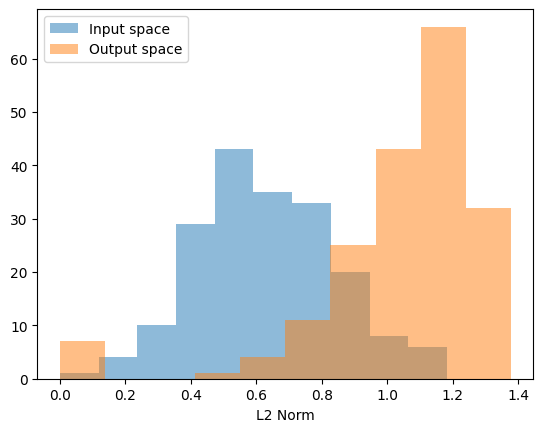

In [ ]:
plt.hist(qstn_f, label = "Input space", alpha = 0.5)
plt.hist(answ_f, label = "Output space", alpha = 0.5)
plt.xlabel("L2 Norm")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/distance.pdf")

### AdvGLUE

In [48]:
import pickle

In [49]:
f = open('/content/drive/MyDrive/nn2_project/qqp_all_qs.pickle', 'rb')
qqp_all_qs_f = pickle.load(f)

f = open('/content/drive/MyDrive/nn2_project/qqp_all_ans.pickle', 'rb')
qqp_all_ans_f = pickle.load(f)

In [50]:
qqp_org_qs_f = qqp_all_qs_f['original']
qqp_pert_qs_f = qqp_all_qs_f['perturbed']

qqp_org_ans_f = qqp_all_ans_f['original']
qqp_pert_ans_f = qqp_all_ans_f['perturbed']

In [51]:
b1_adv_f,b2_adv_f,b3_adv_f,b4_adv_f = get_bleus(qqp_org_qs_f, qqp_pert_qs_f)

In [52]:
b1_adv_f_op,b2_adv_f_op,b3_adv_f_op,b4_adv_f_op = get_bleus(qqp_org_ans_f, qqp_pert_ans_f)

In [53]:
m_adv_f_in = get_meteor(qqp_org_qs_f, qqp_pert_qs_f)

In [54]:
m_adv_f_out = get_meteor(qqp_org_ans_f, qqp_pert_ans_f)

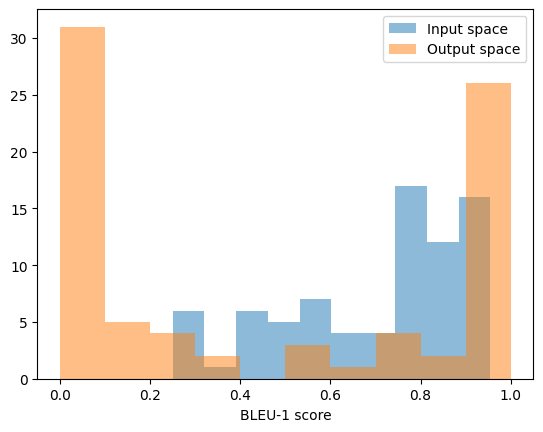

In [ ]:
plt.hist(b1_adv_f, label = "Input space", alpha = 0.5)
plt.hist(b1_adv_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-1 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu_adv1.pdf")

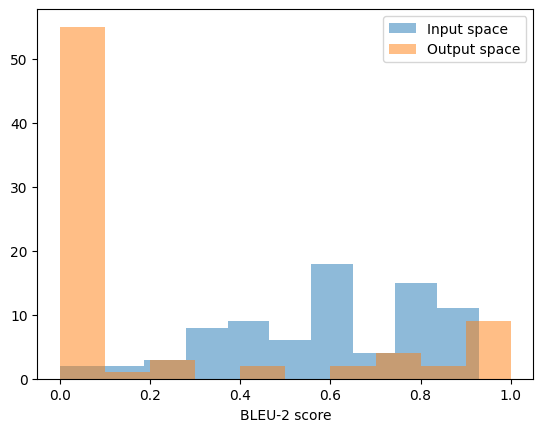

In [ ]:
plt.hist(b2_adv_f, label = "Input space", alpha = 0.5)
plt.hist(b2_adv_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-2 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu_adv2.pdf")

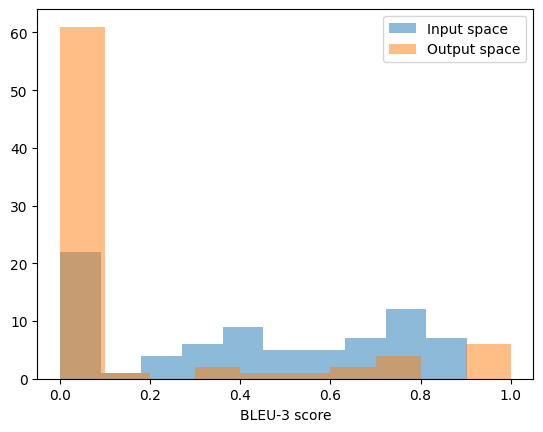

In [ ]:
plt.hist(b3_adv_f, label = "Input space", alpha = 0.5)
plt.hist(b3_adv_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-3 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu_adv3.pdf")

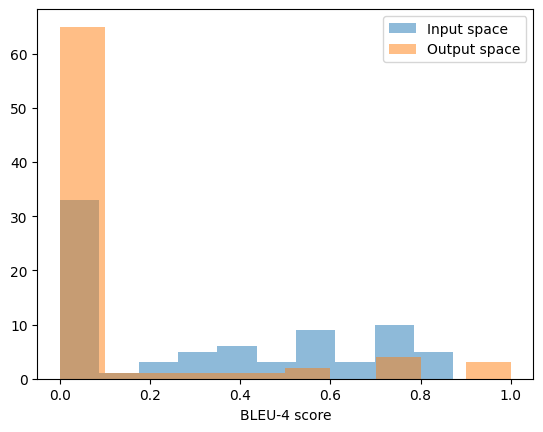

In [ ]:
plt.hist(b4_adv_f, label = "Input space", alpha = 0.5)
plt.hist(b4_adv_f_op, label = "Output space", alpha = 0.5)
plt.xlabel("BLEU-4 score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/bleu_adv4.pdf")

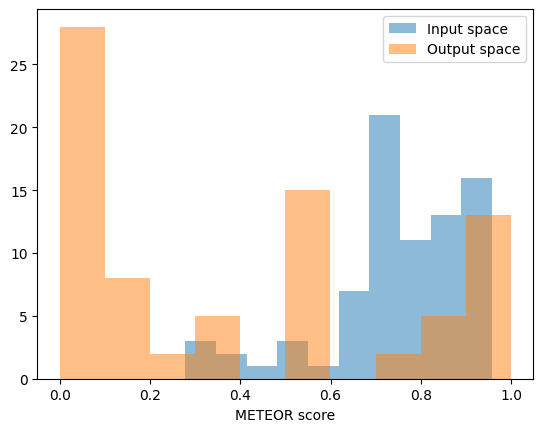

In [ ]:
plt.hist(m_adv_f_in, label = "Input space", alpha = 0.5)
plt.hist(m_adv_f_out, label = "Output space", alpha = 0.5)
plt.xlabel("METEOR score")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/meteor_adv.pdf")

In [55]:
org_emb_adv_f = sentence_model.encode(qqp_org_qs_f)
pert_emb_adv_f = sentence_model.encode(qqp_pert_qs_f)

org_op_emb_adv_f = sentence_model.encode(qqp_org_ans_f)
pert_op_emb_adv_f = sentence_model.encode(qqp_pert_ans_f)

In [56]:
qstn_adv_f = np.linalg.norm(org_emb_adv_f - pert_emb_adv_f, axis = 1)
answ_adv_f = np.linalg.norm(org_op_emb_adv_f - pert_op_emb_adv_f, axis = 1)

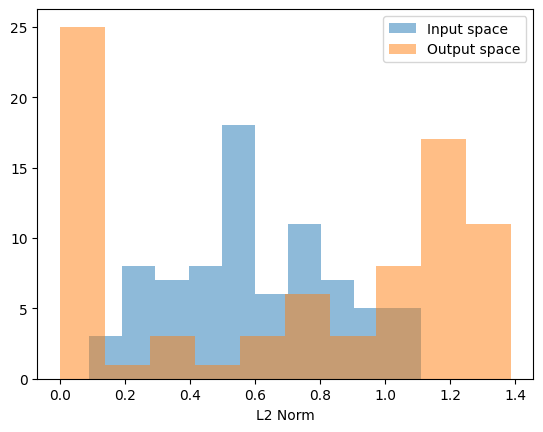

In [ ]:
plt.hist(qstn_adv_f, label = "Input space", alpha = 0.5)
plt.hist(answ_adv_f, label = "Output space", alpha = 0.5)
plt.xlabel("L2 Norm")
plt.legend()
plt.savefig("/content/drive/MyDrive/nn2_project/flan/distance_adv.pdf")

# Numbers

### ChatGPT

#### Seq2sick

##### Input

In [57]:
b1_c_mean = np.mean(b1_c)
b2_c_mean = np.mean(b2_c)
b3_c_mean = np.mean(b3_c)
b4_c_mean = np.mean(b4_c)
m_c_in_mean = np.mean(m_c_in)
dist_c_mean = np.mean(qstn)

b1_c_std = np.std(b1_c)
b2_c_std = np.std(b2_c)
b3_c_std = np.std(b3_c)
b4_c_std = np.std(b4_c)
m_c_in_std = np.std(m_c_in)
dist_c_std = np.std(qstn)

##### Output

In [58]:
b1_c_op_mean = np.mean(b1_c_op)
b2_c_op_mean = np.mean(b2_c_op)
b3_c_op_mean = np.mean(b3_c_op)
b4_c_op_mean = np.mean(b4_c_op)
m_c_op_mean = np.mean(m_c_out)
dist_c_op_mean = np.mean(answ)

b1_c_op_std = np.std(b1_c_op)
b2_c_op_std = np.std(b2_c_op)
b3_c_op_std = np.std(b3_c_op)
b4_c_op_std = np.std(b4_c_op)
m_c_op_std = np.std(m_c_out)
dist_c_op_std = np.std(answ)

#### AdvGlue

##### Input

In [59]:
b1_c_adv_mean = np.mean(b1_adv_c)
b2_c_adv_mean = np.mean(b2_adv_c)
b3_c_adv_mean = np.mean(b3_adv_c)
b4_c_adv_mean = np.mean(b4_adv_c)
m_c_adv_in_mean = np.mean(m_adv_c_in)
dist_c_adv_mean = np.mean(qstn_adv_c)

b1_c_adv_std = np.std(b1_adv_c)
b2_c_adv_std = np.std(b2_adv_c)
b3_c_adv_std = np.std(b3_adv_c)
b4_c_adv_std = np.std(b4_adv_c)
m_c_adv_in_std = np.std(m_adv_c_in)
dist_c_adv_std = np.std(qstn_adv_c)

##### Output

In [60]:
b1_c_adv_op_mean = np.mean(b1_adv_c_op)
b2_c_adv_op_mean = np.mean(b2_adv_c_op)
b3_c_adv_op_mean = np.mean(b3_adv_c_op)
b4_c_adv_op_mean = np.mean(b4_adv_c_op)
m_c_adv_op_mean = np.mean(m_adv_c_out)
dist_c_adv_op_mean = np.mean(answ_adv_c)

b1_c_adv_op_std = np.std(b1_c_op)
b2_c_adv_op_std = np.std(b2_c_op)
b3_c_adv_op_std = np.std(b3_c_op)
b4_c_adv_op_std = np.std(b4_c_op)
m_c_adv_op_std = np.std(m_c_out)
dist_c_adv_op_std = np.std(answ_adv_c)

### FLAN T5

#### Seq2sick

##### Input

In [64]:
b1_f_mean = np.mean(b1_f)
b2_f_mean = np.mean(b2_f)
b3_f_mean = np.mean(b3_f)
b4_f_mean = np.mean(b4_f)
m_f_in_mean = np.mean(m_f_in)
dist_f_mean = np.mean(qstn_f)

b1_f_std = np.std(b1_f)
b2_f_std = np.std(b2_f)
b3_f_std = np.std(b3_f)
b4_f_std = np.std(b4_f)
m_f_in_std = np.std(m_f_in)
dist_f_std = np.std(qstn_f)

##### Output

In [65]:
b1_f_op_mean = np.mean(b1_f_op)
b2_f_op_mean = np.mean(b2_f_op)
b3_f_op_mean = np.mean(b3_f_op)
b4_f_op_mean = np.mean(b4_f_op)
m_f_op_mean = np.mean(m_f_out)
dist_f_op_mean = np.mean(answ_f)

b1_f_op_std = np.std(b1_f_op)
b2_f_op_std = np.std(b2_f_op)
b3_f_op_std = np.std(b3_f_op)
b4_f_op_std = np.std(b4_f_op)
m_f_op_std = np.std(m_f_out)
dist_f_op_std = np.std(answ_f)

#### AdvGlue

##### Input

In [66]:
b1_f_adv_mean = np.mean(b1_adv_f)
b2_f_adv_mean = np.mean(b2_adv_f)
b3_f_adv_mean = np.mean(b3_adv_f)
b4_f_adv_mean = np.mean(b4_adv_f)
m_f_adv_in_mean = np.mean(m_adv_f_in)
dist_f_adv_mean = np.mean(qstn_adv_f)

b1_f_adv_std = np.std(b1_adv_f)
b2_f_adv_std = np.std(b2_adv_f)
b3_f_adv_std = np.std(b3_adv_f)
b4_f_adv_std = np.std(b4_adv_f)
m_f_adv_in_std = np.std(m_adv_f_in)
dist_f_adv_std = np.std(qstn_adv_f)

##### Output

In [67]:
b1_f_adv_op_mean = np.mean(b1_adv_f_op)
b2_f_adv_op_mean = np.mean(b2_adv_f_op)
b3_f_adv_op_mean = np.mean(b3_adv_f_op)
b4_f_adv_op_mean = np.mean(b4_adv_f_op)
m_f_adv_op_mean = np.mean(m_adv_f_out)
dist_f_adv_op_mean = np.mean(answ_adv_f)

b1_f_adv_op_std = np.std(b1_f_op)
b2_f_adv_op_std = np.std(b2_f_op)
b3_f_adv_op_std = np.std(b3_f_op)
b4_f_adv_op_std = np.std(b4_f_op)
m_f_adv_op_std = np.std(m_f_out)
dist_f_adv_op_std = np.std(answ_adv_f)

## Plots

In [ ]:
ind = np.arange(10)
width = 0.3
xtick = ['BLEU1', 'BLEU2', 'BLEU3', 'BLEU4', 'METEOR', 'BLEU1', 'BLEU2', 'BLEU3', 'BLEU4', 'METEOR']

In [ ]:
c_in = ['midnightblue']*5 + ['blue']*5
c_out = ['red']*5 + ['darkorange']*5

In [ ]:
from matplotlib.lines import Line2D

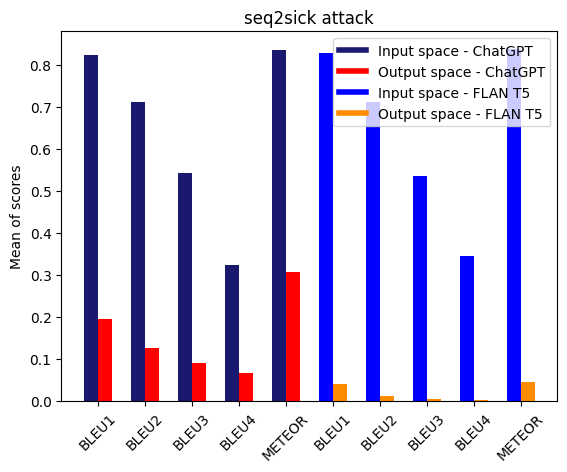

In [ ]:
plt.bar(ind , [b1_c_mean, b2_c_mean, b3_c_mean, b4_c_mean, m_c_in_mean, b1_f_mean, b2_f_mean, b3_f_mean, b4_f_mean, m_f_in_mean], width, label = "ChatGPT", color = c_in)
plt.bar(ind+width, [b1_c_op_mean, b2_c_op_mean, b3_c_op_mean, b4_c_op_mean, m_c_op_mean, b1_f_op_mean, b2_f_op_mean, b3_f_op_mean, b4_f_op_mean, m_f_op_mean], width, label = "FLAN T5", color = c_out)
plt.ylabel("Mean of scores")
plt.xticks(ind + width / 2, xtick, rotation = 45)
plt.title("seq2sick attack")

custom_lines = [Line2D([0], [0], color='midnightblue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='darkorange', lw=4)]
plt.legend(custom_lines, ['Input space - ChatGPT', 'Output space - ChatGPT', 'Input space - FLAN T5', 'Output space - FLAN T5'])
plt.savefig("/content/drive/MyDrive/nn2_project/metrics_all_seq2sick.pdf")

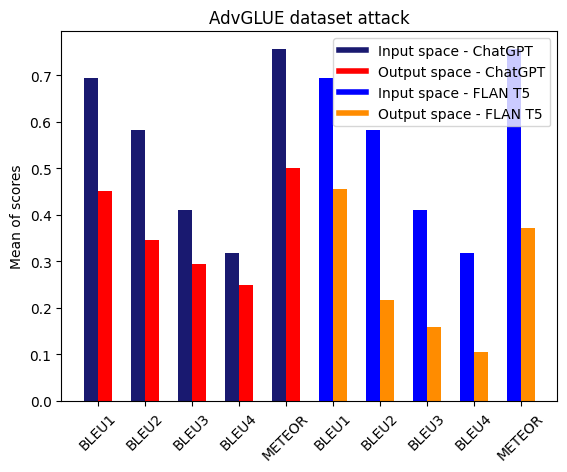

In [ ]:
plt.bar(ind , [b1_c_adv_mean, b2_c_adv_mean, b3_c_adv_mean, b4_c_adv_mean, m_c_adv_in_mean, b1_f_adv_mean, b2_f_adv_mean, b3_f_adv_mean, b4_f_adv_mean, m_f_adv_in_mean], width, label = "ChatGPT", color = c_in)
plt.bar(ind+width, [b1_c_adv_op_mean, b2_c_adv_op_mean, b3_c_adv_op_mean, b4_c_adv_op_mean, m_c_adv_op_mean, b1_f_adv_op_mean, b2_f_adv_op_mean, b3_f_adv_op_mean, b4_f_adv_op_mean, m_f_adv_op_mean], width, label = "FLAN T5", color = c_out)
plt.ylabel("Mean of scores")
plt.xticks(ind + width / 2, xtick, rotation = 45)
plt.title("AdvGLUE dataset attack")

custom_lines = [Line2D([0], [0], color='midnightblue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='darkorange', lw=4)]
plt.legend(custom_lines, ['Input space - ChatGPT', 'Output space - ChatGPT', 'Input space - FLAN T5', 'Output space - FLAN T5'])
plt.savefig("/content/drive/MyDrive/nn2_project/metrics_all_adv.pdf")

In [ ]:
c_in_dist = ['midnightblue']*2 + ['blue']*2
c_out_dist = ['red']*2 + ['darkorange']*2

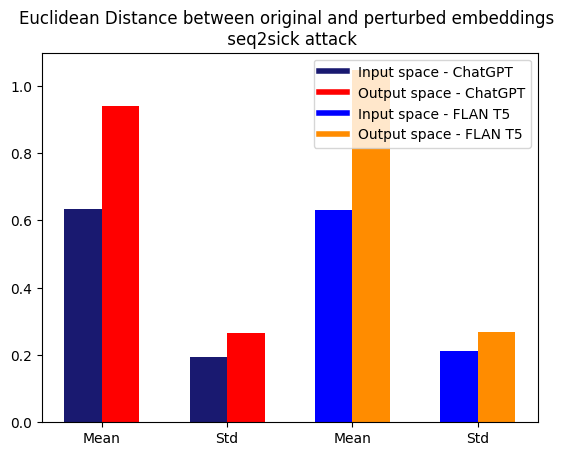

In [ ]:
plt.bar(np.array([0, 1, 2, 3]), [dist_c_mean, dist_c_std, dist_f_mean, dist_f_std], width, label = "Input space", color = c_in_dist)
plt.bar(np.array([0, 1, 2, 3])+width, [dist_c_op_mean, dist_c_op_std, dist_f_op_mean, dist_f_op_std], width, label = "Output space", color = c_out_dist)
# plt.ylabel("Mean of scores")
plt.xticks(np.array([0,1,2,3]) + width / 2, ["Mean", "Std", "Mean", "Std"])
plt.title("Euclidean Distance between original and perturbed embeddings \n seq2sick attack")

custom_lines = [Line2D([0], [0], color='midnightblue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='darkorange', lw=4)]
plt.legend(custom_lines, ['Input space - ChatGPT', 'Output space - ChatGPT', 'Input space - FLAN T5', 'Output space - FLAN T5'])

plt.savefig("/content/drive/MyDrive/nn2_project/distance_sts.pdf")

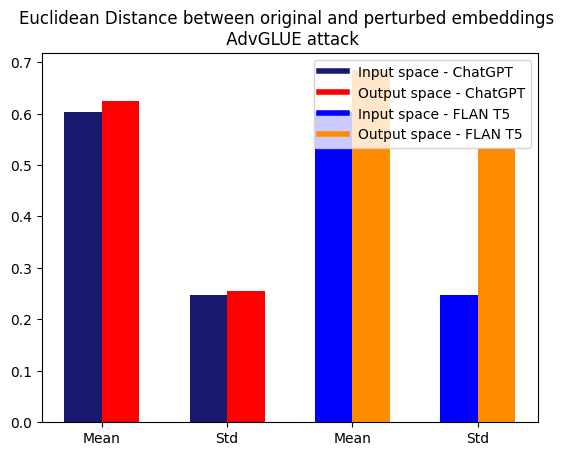

In [ ]:
plt.bar(np.array([0, 1, 2, 3]), [dist_c_adv_mean, dist_c_adv_std, dist_f_adv_mean, dist_f_adv_std], width, label = "Input space", color = c_in_dist)
plt.bar(np.array([0, 1, 2, 3])+width, [dist_c_adv_op_mean, dist_c_adv_op_std, dist_f_adv_op_mean, dist_f_adv_op_std], width, label = "Output space", color = c_out_dist)
# plt.ylabel("Mean of scores")
plt.xticks(np.array([0,1,2,3]) + width / 2, ["Mean", "Std", "Mean", "Std"])
plt.title("Euclidean Distance between original and perturbed embeddings \n AdvGLUE attack")

custom_lines = [Line2D([0], [0], color='midnightblue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='darkorange', lw=4)]
plt.legend(custom_lines, ['Input space - ChatGPT', 'Output space - ChatGPT', 'Input space - FLAN T5', 'Output space - FLAN T5'])

plt.savefig("/content/drive/MyDrive/nn2_project/distance_adv.pdf")

## More numbers

In [ ]:
print(np.mean(df_csv_append.num_queries))
print(np.mean(df_csv_append_f.num_queries))

59.87
60.79365079365079


In [ ]:
df_csv_append.iloc[60]

original_text                           where great britain [[located]]?
perturbed_text                      where great britain [[positioning]]?
original_score                                                  0.435897
perturbed_score                                                      1.0
original_output        Great Britain is located in western Europe, su...
perturbed_output       As an AI language model, I cannot provide a cu...
ground_truth_output    Great Britain is an island located in the nort...
num_queries                                                           54
result_type                                                   Successful
Name: 60, dtype: object

In [ ]:
df_csv_append.iloc[60]['perturbed_output']

'As an AI language model, I cannot provide a current positioning of Great Britain as it constantly changes based on various factors such as political, economic, and social developments. However, Great Britain is a highly developed country in Europe and has a significant'

In [ ]:
df_csv_append.iloc[60]['original_output']

'Great Britain is located in western Europe, surrounded by the Atlantic Ocean, the North Sea, the English Channel, and the Irish Sea.'

In [ ]:
df_csv_append.iloc[149]

original_text             where do most [[earthquakes]] happen in japan?
perturbed_text            where do most [[convulsions]] happen in japan?
original_score                                                     0.475
perturbed_score                                                      1.0
original_output        Most earthquakes in Japan occur along the Paci...
perturbed_output       As an AI language model, I do not have access ...
ground_truth_output    Most earthquakes in Japan occur along the Paci...
num_queries                                                           54
result_type                                                   Successful
Name: 149, dtype: object

In [ ]:
df_csv_append.iloc[149]['perturbed_output']

'As an AI language model, I do not have access to real-time information or statistics. However, convulsions can happen anywhere in Japan, just like any other place in the world. It is important to seek medical attention immediately if someone'

In [ ]:
df_csv_append.iloc[149]['original_output']

'Most earthquakes in Japan occur along the Pacific Ring of Fire, which is a horseshoe-shaped area around the Pacific Ocean where many tectonic plates meet. Specifically, the regions of Honshu, Hokkaido, and Ky'

In [ ]:
import string

def count_words_of_format(sent):
    words = sent.split()
    count = 0
    total = 0
    for word in words:
        total += 1
        if word.startswith("[[") and word.endswith("]]"):
            count += 1
        elif any(char in string.punctuation for char in word[-2:]):
            # Remove last character if it is punctuation
            if word[-1] in string.punctuation:
                word = word[:-1]
            if word.startswith("[[") and word.endswith("]]"):
                count += 1
    return count, total


In [ ]:
total, count = 0,0
for i in range(len(df_csv_append)):
  c, t = count_words_of_format(df_csv_append.original_text[i])
  count += c
  total += t

perc = 100*count/total
print(perc)

16.44787644787645


In [ ]:
total, count = 0,0
for i in range(len(df_csv_append_f)):
  c, t = count_words_of_format(df_csv_append.original_text[i])
  count += c
  total += t

perc = 100*count/total
print(perc)

16.652994257588187
